<a href="https://colab.research.google.com/github/Priyo-prog/Time-series-analysis/blob/main/Intoduction/Time_series_white_noise_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **White Noise Data**

White noise is a special type of time-series where data doesn't follow a pattern.

## Import packages and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import the data

In [2]:
## mount the google drive to fetch the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## load the dataset
raw_csv_data = pd.read_csv('/content/drive/MyDrive/Data Science/Time Series/Index2018.csv')
raw_csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
## transforming the dataset
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b') # business days as frequency
df_comp = df_comp.fillna(method='ffill')

## Removing the Surplus Data

In [5]:
df_comp['market_value'] = df_comp.spx

In [6]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


## Splitting the Training and Testing Data

In [7]:
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## White Noise

We can differetiate the **White Noise** data from a regular **time-series** data by comparing their graphs. To demonstrate this we can generate **white noise** data and plot it's values. Then we can plot the graph of S&P closing prices and compare the two. 

In [8]:
## create the white noise
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [9]:
## add the white noise to the dataframe
df['wn'] = wn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df.head()

,market_value,wn
date,,
1994-01-07,469.90,1094.135132
1994-01-10,475.27,586.039499
1994-01-11,474.13,1160.749579
1994-01-12,474.17,1073.881168
1994-01-13,472.47,1016.513412


In [11]:
## get the statistical data of the dataframe with white noise
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1093.295191
std,292.559287,298.466953
min,438.920000,23.802342
25%,914.620000,893.632102
50%,1144.650000,1090.894199
75%,1316.280729,1289.524282
max,1570.252238,2182.498897


In the above dataframe we can see that mean of the market value and the white noise is same. This is because normally it is distributed around the mean of the S&P value. Since each one is generated individually, the average does not have to end up being the same.

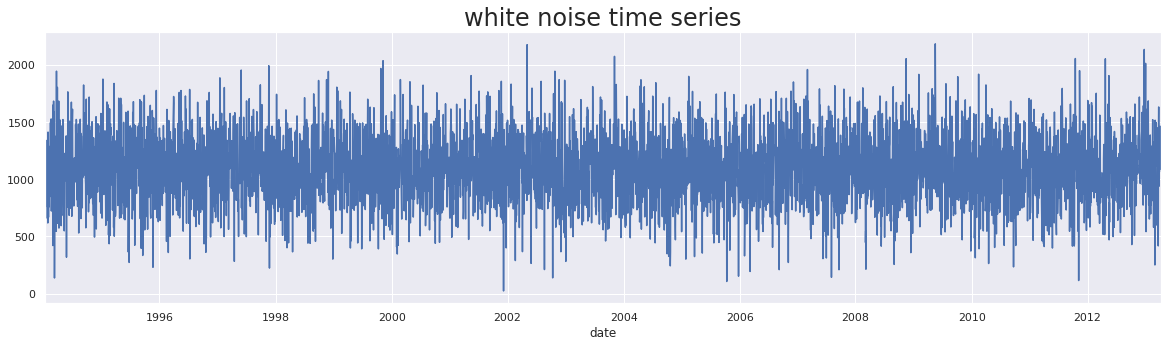

In [12]:
df.wn.plot(figsize=(20,5))
plt.title('white noise time series', size=24)
plt.show()

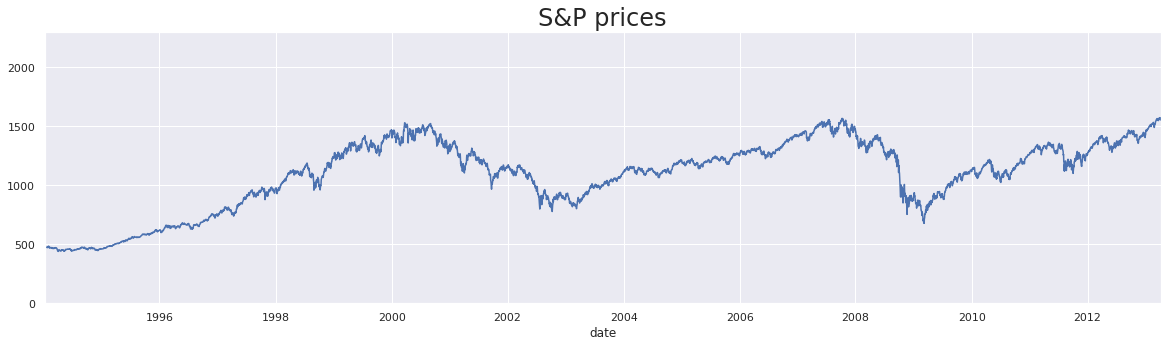

In [13]:
df.market_value.plot(figsize=(20,5))
plt.title('S&P prices', size=24)
plt.ylim(0,2300)
plt.show()

# **Random Walk**

Random walk is a special type of time-series, where values tend to **persist** over the time and the **differences between periods** are simply white noise.

In [14]:
rw = pd.read_csv("/content/drive/MyDrive/Data Science/Time Series/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index("date", inplace=True)
rw = rw.asfreq('b')

In [15]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [16]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [17]:
df['rw'] = rw.price
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,market_value,wn,rw
date,,,
1994-01-07,469.90,1094.135132,1122.139662
1994-01-10,475.27,586.039499,1080.347860
1994-01-11,474.13,1160.749579,1082.095245
1994-01-12,474.17,1073.881168,1083.639265
1994-01-13,472.47,1016.513412,1067.146255


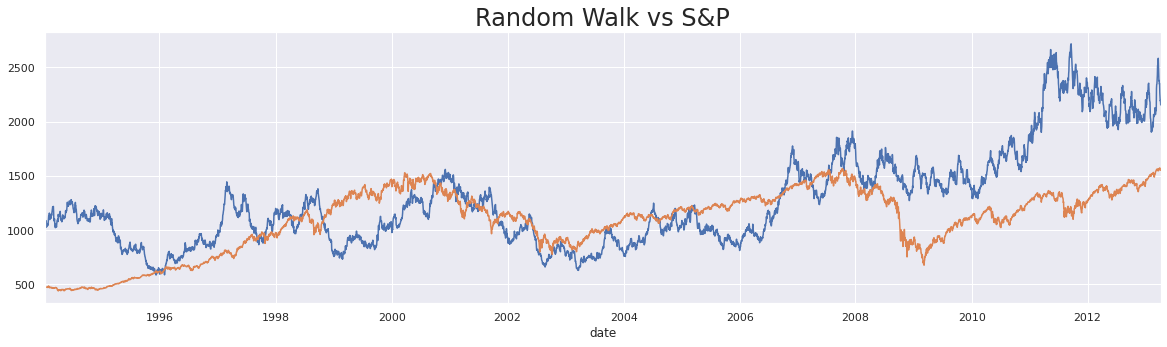

In [19]:
## plot the 'rw' column
df.rw.plot(figsize=(20,5))
df.market_value.plot()
plt.title('Random Walk vs S&P', size=24)
plt.show()

# **Stationarity**

In [20]:
sts.adfuller(df.market_value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39904.880607487445)